In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

sns.set(style="whitegrid", context="talk")

BASE_DIR = "/content/drive/MyDrive/Colab Notebooks/Data_Mining/Results"


FILE_NO_RPE = f"{BASE_DIR}/results_2_noRPE_2025-12-15_17-33-07.csv"
FILE_RPE    = f"{BASE_DIR}/results_2_RPE_2025-12-15_14-00-50.csv"

no_rpe = pd.read_csv(FILE_NO_RPE)
with_rpe = pd.read_csv(FILE_RPE)

for df in [no_rpe, with_rpe]:
    if "rpe_type" not in df.columns:
        df["rpe_type"] = pd.NA

df = pd.concat([no_rpe, with_rpe], ignore_index=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# ----------------------------------------
# Filter epoch = 20
# ----------------------------------------
df_e20 = df[((df["epoch"] == 20) & (df["dataset"]== "cifar10")) | ((df["epoch"] == 5) & (df["dataset"]== "mnist"))]
columns = ["dataset", "attn_type", "rpe_type", "test_acc"]
df_e20 = df_e20[columns]

df_e20

,dataset,attn_type,rpe_type,test_acc
4,mnist,full,NaN,0.8756
9,mnist,favor+,NaN,0.8662
14,mnist,relu,NaN,0.8899
34,cifar10,full,NaN,0.5693
54,cifar10,favor+,NaN,0.5524
74,cifar10,relu,NaN,0.5449
79,mnist,full,none,0.8644
84,mnist,favor+,none,0.8494
89,mnist,favor+,rope,0.9744
94,mnist,favor+,classic,0.8671


In [45]:
def model_name(row):
    attn = row["attn_type"].upper()
    rpe = row["rpe_type"]

    if attn == "FULL":
        return "VIT (FULL ATTENTION)"

    if pd.isna(rpe) or rpe == "none":
        return f"PERFORMER-{attn} & None"

    return f"PERFORMER-{attn} & {rpe.upper()}"


In [46]:
df["model"] = df.apply(model_name, axis=1)

summary_acc = (
    df
    .groupby(["dataset", "model"])
    .agg(
        test_acc_mean=("test_acc", "mean"),
        test_acc_std=("test_acc", "std"),
    )
    .reset_index()
)

time_summary = (
    df
    .groupby(["dataset", "model"])
    .agg(
        train_time_mean=("train_time_sec", "mean"),
        eval_time_mean=("eval_time_sec", "mean"),
    )
    .reset_index()
)


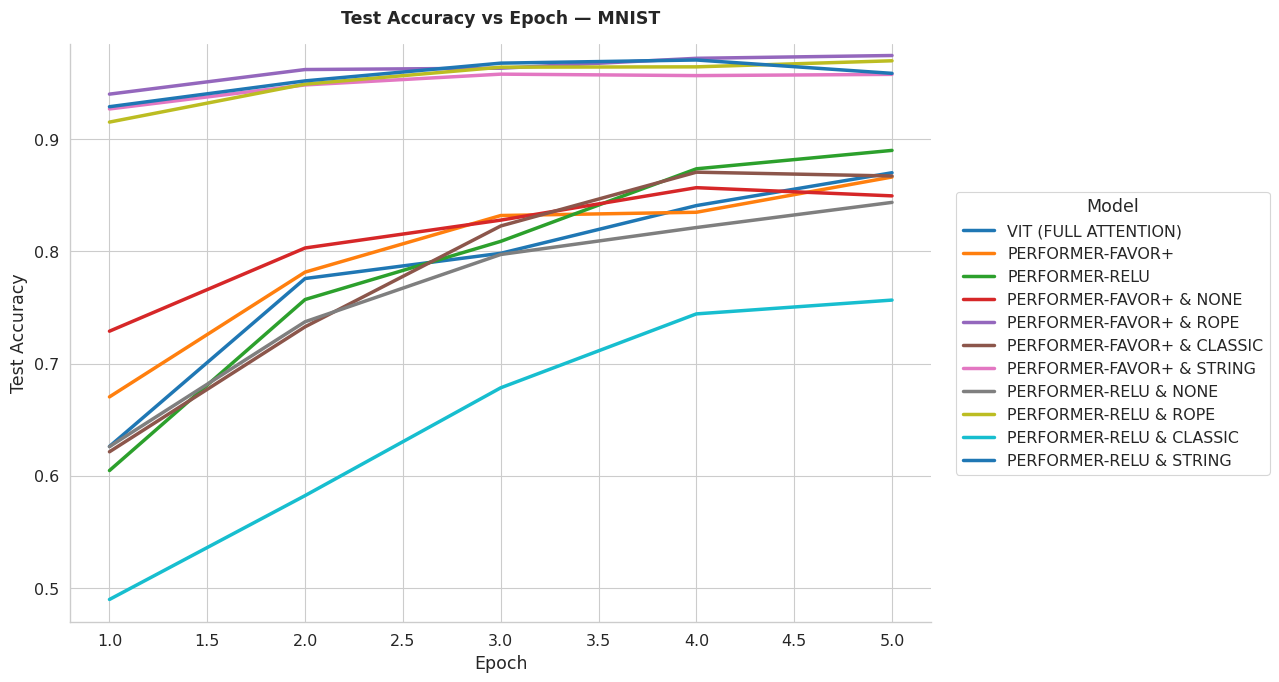

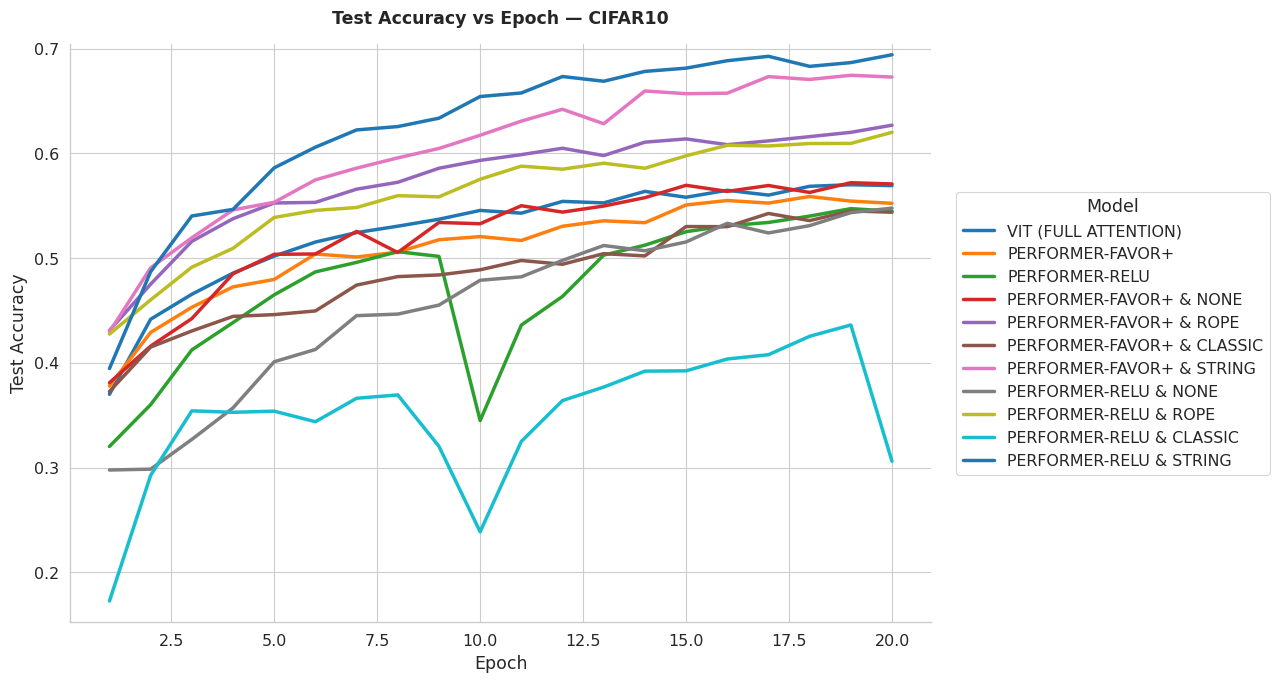

In [16]:
def plot_accuracy_vs_epoch(dataset):
    data = df[df["dataset"] == dataset].copy()
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)

    plt.figure(figsize=(13, 7))

    ax = sns.lineplot(
        data=data,
        x="epoch",
        y="test_acc",
        hue="model",
        style="model",
        linewidth=2.5,
        markers=False,
        dashes=False,
        errorbar=None,
        palette="tab10"
    )

    ax.set_title(
        f"Test Accuracy vs Epoch — {dataset.upper()}",
        pad=15,
        weight="bold"
    )
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Test Accuracy")

    ax.set_ylim(
        data["test_acc"].min() - 0.02,
        min(1.0, data["test_acc"].max() + 0.01)
    )

    ax.legend(
        title="Model",
        frameon=True,
        loc="center left",
        bbox_to_anchor=(1.02, 0.5)
    )

    sns.despine()
    plt.tight_layout()
    plt.show()

plot_accuracy_vs_epoch("mnist")
plot_accuracy_vs_epoch("cifar10")


In [17]:
time_summary = (
    df
    .groupby(["dataset", "model"])
    .agg(
        train_time_mean=("train_time_sec", "mean"),
        eval_time_mean=("eval_time_sec", "mean"),
    )
    .reset_index()
)

time_summary

,dataset,model,train_time_mean,eval_time_mean
0,cifar10,PERFORMER-FAVOR+,17.708298,2.032647
1,cifar10,PERFORMER-FAVOR+ & CLASSIC,17.349714,2.049580
2,cifar10,PERFORMER-FAVOR+ & NONE,17.070391,1.956524
3,cifar10,PERFORMER-FAVOR+ & ROPE,17.890807,2.027659
4,cifar10,PERFORMER-FAVOR+ & STRING,17.776746,2.016548
5,cifar10,PERFORMER-RELU,15.342840,1.927081
6,cifar10,PERFORMER-RELU & CLASSIC,15.397894,1.689619
7,cifar10,PERFORMER-RELU & NONE,14.569074,1.745430
8,cifar10,PERFORMER-RELU & ROPE,15.331050,1.813870
9,cifar10,PERFORMER-RELU & STRING,15.542374,1.777526


/tmp/ipython-input-1223297724.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


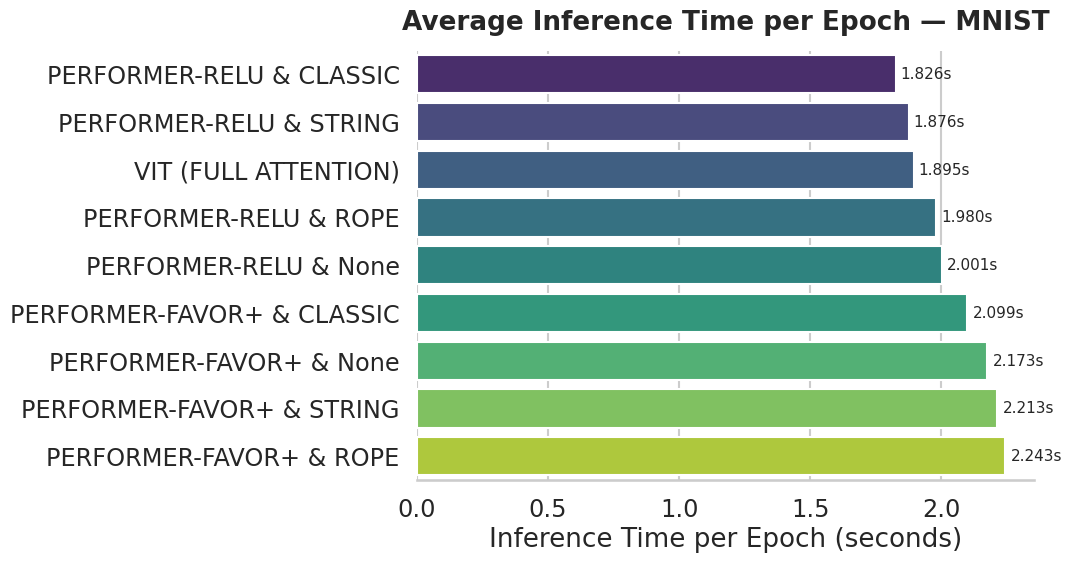

/tmp/ipython-input-1223297724.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


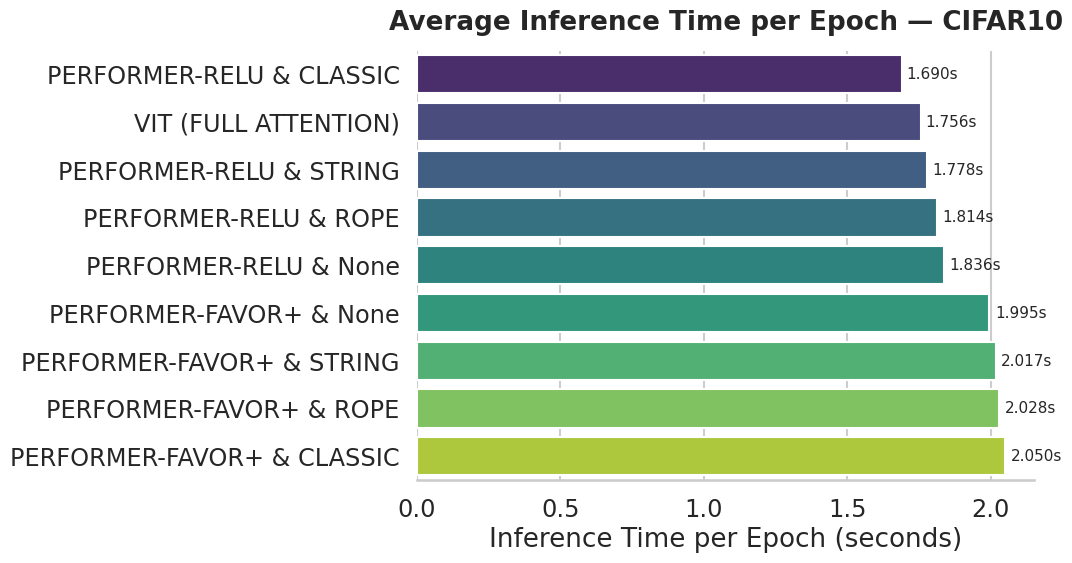

In [47]:
def plot_inference_time(dataset):
    data = (
        time_summary[time_summary["dataset"] == dataset]
        .sort_values("eval_time_mean", ascending=True)
        .copy()
    )

    sns.set_theme(
        style="whitegrid",
        context="talk",
        font_scale=1.05
    )

    plt.figure(figsize=(11, 6))

    ax = sns.barplot(
        data=data,
        x="eval_time_mean",
        y="model",
        palette="viridis"
    )

    ax.set_title(
        f"Average Inference Time per Epoch — {dataset.upper()}",
        weight="bold",
        pad=15
    )
    ax.set_xlabel("Inference Time per Epoch (seconds)")
    ax.set_ylabel("")

    for p in ax.patches:
        width = p.get_width()
        ax.text(
            width * 1.01,
            p.get_y() + p.get_height() / 2,
            f"{width:.3f}s",
            va="center",
            fontsize=11
        )

    sns.despine(left=True)
    plt.tight_layout()
    plt.show()
plot_inference_time("mnist")
plot_inference_time("cifar10")


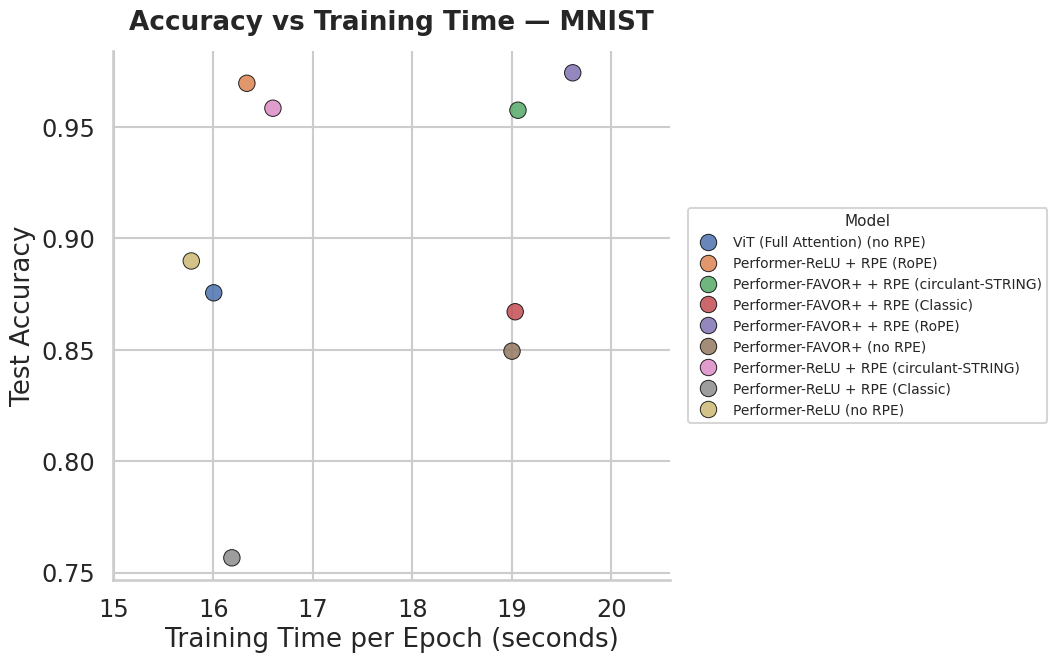

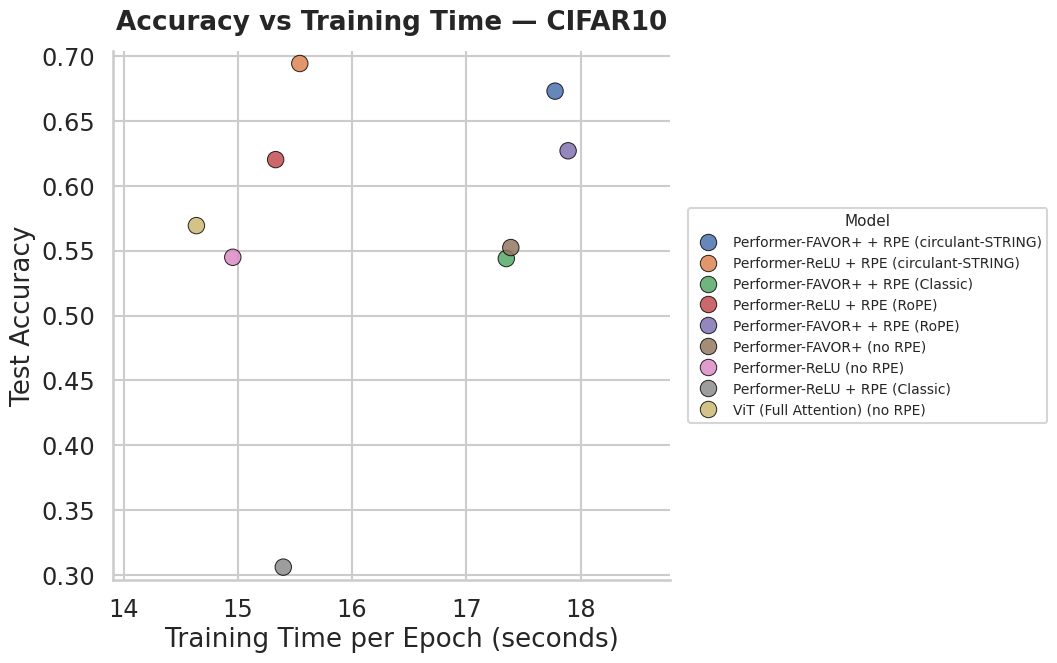

In [40]:
def plot_tradeoff(dataset):
    merged = summary_acc.merge(
        time_summary,
        on=["dataset", "model"],
        how="inner"
    )

    data = merged[merged["dataset"] == dataset].copy()

    sns.set_theme(style="whitegrid", context="talk", font_scale=1.05)
    plt.figure(figsize=(11, 7))

    ax = sns.scatterplot(
        data=data,
        x="train_time_mean",
        y="test_acc_mean",
        hue="model",
        s=140,
        edgecolor="black",
        linewidth=0.7,
        alpha=0.85
    )

    ax.set_title(
        f"Accuracy vs Training Time — {dataset.upper()}",
        weight="bold",
        pad=15
    )
    ax.set_xlabel("Training Time per Epoch (seconds)")
    ax.set_ylabel("Test Accuracy")

    ax.set_xlim(
        data["train_time_mean"].min() * 0.95,
        data["train_time_mean"].max() * 1.05
    )
    ax.set_ylim(
        data["test_acc_mean"].min() - 0.01,
        min(1.0, data["test_acc_mean"].max() + 0.01)
    )

    ax.legend(
        title="Model",
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=True,
        fontsize=10,
        title_fontsize=11
    )

    sns.despine()
    plt.tight_layout()
    plt.show()



plot_tradeoff("mnist")
plot_tradeoff("cifar10")

In [20]:
stability = (
    df
    .groupby(["dataset", "model"])
    .agg(test_acc_std=("test_acc", "std"))
    .reset_index()
    .sort_values("test_acc_std")
)

stability

,dataset,model,test_acc_std
15,mnist,PERFORMER-FAVOR+ & STRING,0.013233
14,mnist,PERFORMER-FAVOR+ & ROPE,0.013571
20,mnist,PERFORMER-RELU & STRING,0.016613
19,mnist,PERFORMER-RELU & ROPE,0.022243
1,cifar10,PERFORMER-FAVOR+ & CLASSIC,0.047575
0,cifar10,PERFORMER-FAVOR+,0.047702
10,cifar10,VIT (FULL ATTENTION),0.051259
13,mnist,PERFORMER-FAVOR+ & NONE,0.051542
3,cifar10,PERFORMER-FAVOR+ & ROPE,0.051715
8,cifar10,PERFORMER-RELU & ROPE,0.052959


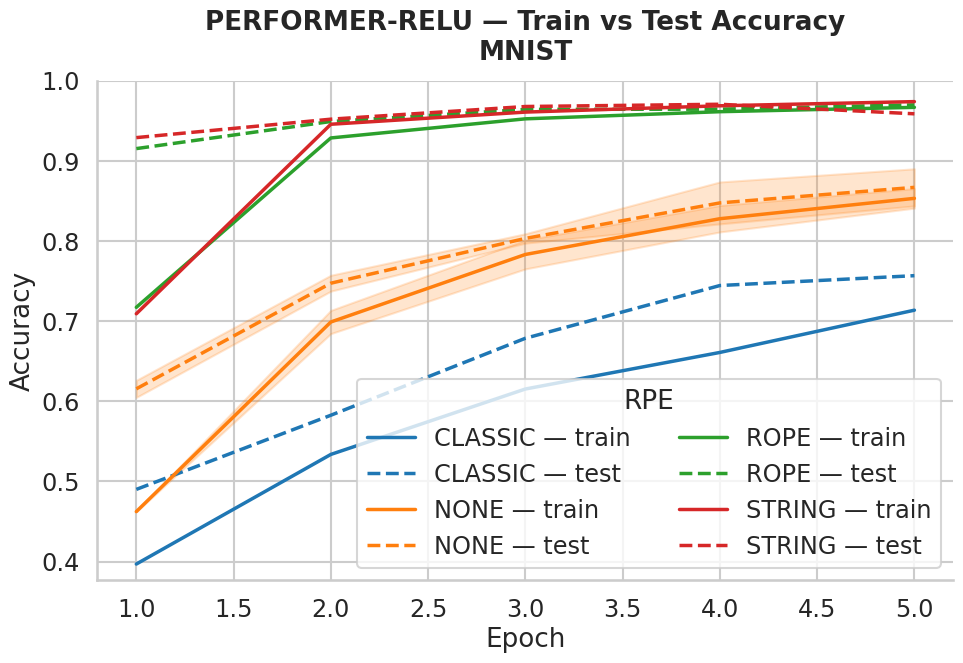

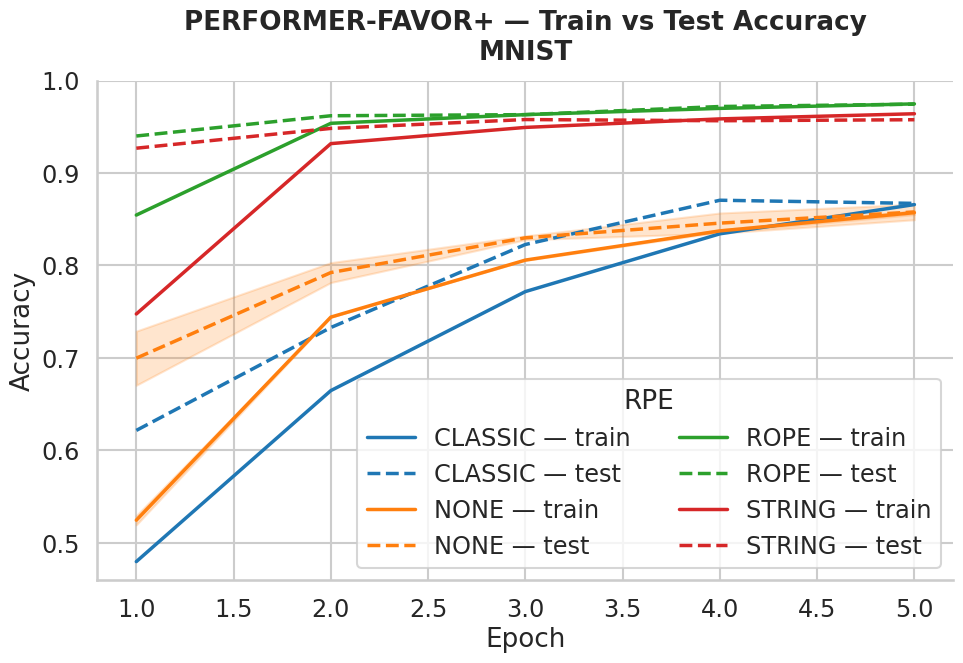

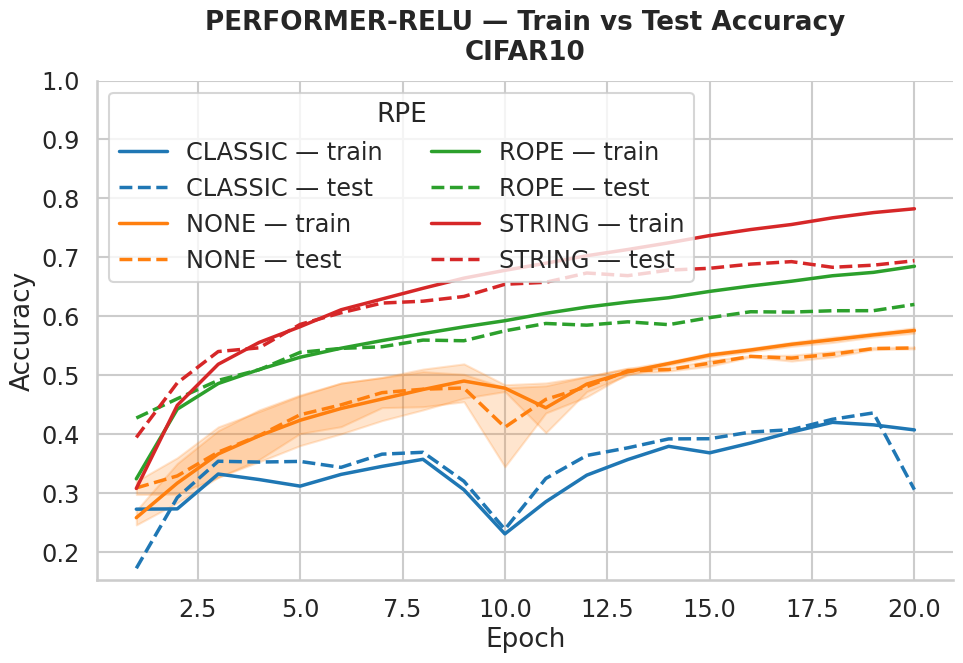

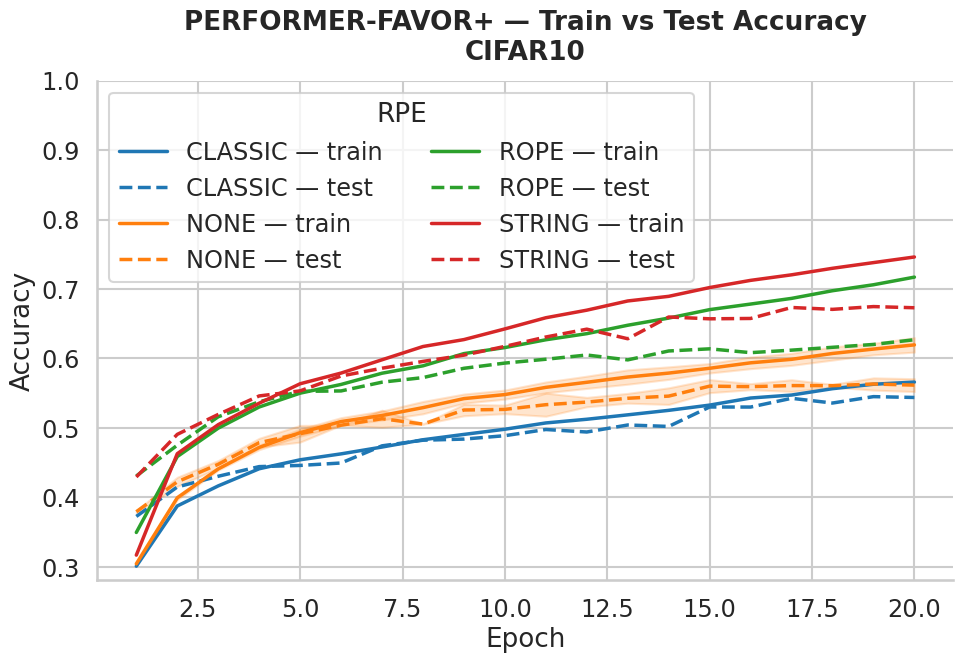

In [21]:
def split_model(model_name):
    parts = model_name.split("&")
    performer = parts[0].strip()
    rpe = parts[1].strip() if len(parts) > 1 else "NONE"
    return performer, rpe

def plot_overfitting_by_performer(dataset, performer_name):
    data = df[df["dataset"] == dataset].copy()
    data[["performer", "rpe"]] = data["model"].apply(
        lambda m: pd.Series(split_model(m))
    )

    data = data[data["performer"] == performer_name]

    sns.set_theme(style="whitegrid", context="talk", font_scale=1.05)
    plt.figure(figsize=(10, 7))

    rpes = sorted(data["rpe"].unique())
    palette = sns.color_palette("tab10", len(rpes))
    color_map = dict(zip(rpes, palette))

    ax = plt.gca()

    for rpe in rpes:
        sub = data[data["rpe"] == rpe]

        sns.lineplot(
            data=sub,
            x="epoch",
            y="train_acc",
            ax=ax,
            color=color_map[rpe],
            linewidth=2.5,
            linestyle="-",
            label=f"{rpe} — train"
        )

        sns.lineplot(
            data=sub,
            x="epoch",
            y="test_acc",
            ax=ax,
            color=color_map[rpe],
            linewidth=2.5,
            linestyle="--",
            label=f"{rpe} — test"
        )

    ax.set_title(
        f"{performer_name} — Train vs Test Accuracy\n{dataset.upper()}",
        weight="bold",
        pad=15
    )
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")

    ax.set_ylim(
        min(data["train_acc"].min(), data["test_acc"].min()) - 0.02,
        1.0
    )

    ax.legend(
        title="RPE",
        frameon=True,
        ncol=2
    )

    sns.despine()
    plt.tight_layout()
    plt.show()
plot_overfitting_by_performer("mnist", "PERFORMER-RELU")
plot_overfitting_by_performer("mnist", "PERFORMER-FAVOR+")

plot_overfitting_by_performer("cifar10", "PERFORMER-RELU")
plot_overfitting_by_performer("cifar10", "PERFORMER-FAVOR+")


# Plot for max settings

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


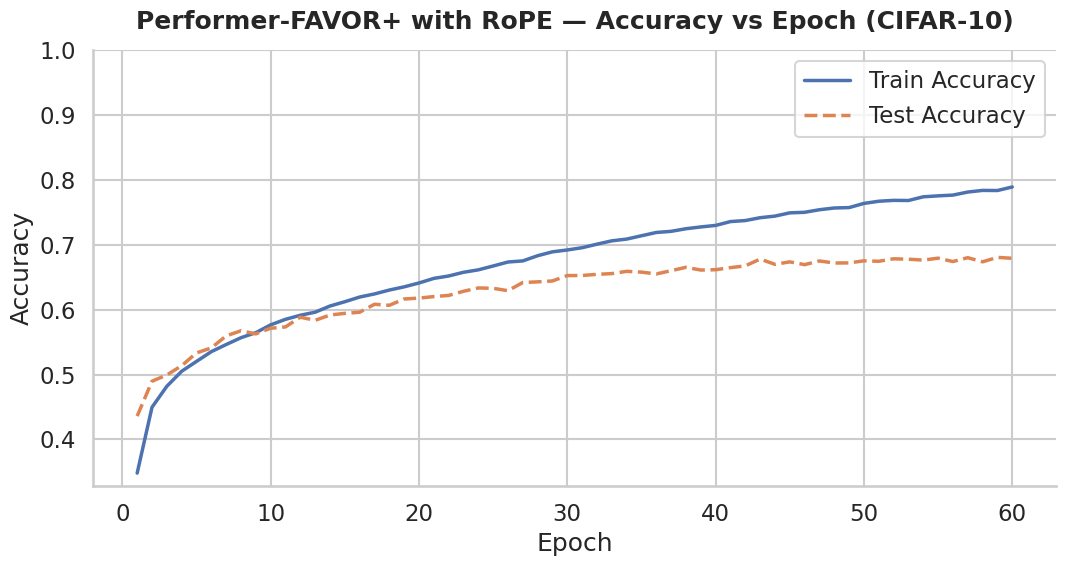

,train_time_sec,eval_time_sec
train_time_mean,18.26553,NaN
eval_time_mean,NaN,2.013823


In [26]:
FILE = f"{BASE_DIR}/results_2_RPE_2025-12-15_18-04-12.csv"

df = pd.read_csv(FILE)

df["dataset"] = "cifar10"
df["model"] = "PERFORMER-FAVOR+ & ROPE"

df.head()
summary_acc = (
    df
    .groupby("model")
    .agg(
        test_acc_mean=("test_acc", "mean"),
        test_acc_std=("test_acc", "std"),
    )
    .reset_index()
)

summary_acc
def plot_accuracy_vs_epoch():
    sns.set_theme(style="whitegrid", context="talk")

    plt.figure(figsize=(11, 6))

    sns.lineplot(
        data=df,
        x="epoch",
        y="train_acc",
        linewidth=2.5,
        label="Train Accuracy"
    )

    sns.lineplot(
        data=df,
        x="epoch",
        y="test_acc",
        linewidth=2.5,
        linestyle="--",
        label="Test Accuracy"
    )

    plt.title(
        "Performer-FAVOR+ with RoPE — Accuracy vs Epoch (CIFAR-10)",
        weight="bold",
        pad=15
    )
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.ylim(
        min(df["train_acc"].min(), df["test_acc"].min()) - 0.02,
        1.0
    )

    plt.legend(frameon=True)
    sns.despine()
    plt.tight_layout()
    plt.show()

plot_accuracy_vs_epoch()
time_summary = df.agg(
    train_time_mean=("train_time_sec", "mean"),
    eval_time_mean=("eval_time_sec", "mean"),
)

time_summary